# Simple network where a centrality crossing occurs

In [44]:
import numpy as np
import xgi
import networkx as nx
import copy
from collections import OrderedDict
from scipy.stats import kendalltau, spearmanr
import matplotlib.pyplot as plt

import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

#import scienceplots
#plt.style.use(['ieee','no-latex'])

from hyperfunctions import *

In [45]:
def G_to_dict(G):
    '''
    Prepare the Networkx Graph for the Hypernetx package
    '''
    
    Gdict = {}
    
    for i, edge in enumerate(G.edges):
        Gdict['edge' + str(i)] = list(edge)
    
    return Gdict

In [53]:
def compare_cents(G, rank_compare=None):
    '''
    Given a networkx graph G compute its xgi 3-Hypergraph H,
    and compare the normalized EIG centrality of G
    with the normalized HEC centrality of H.
    If rank_compare is spearmanr or kendalltau, return that correlation value.
    '''

    # Compute the EIG
    EIG = list(nx.eigenvector_centrality_numpy(G).values())
    
    print(EIG)
    
    # Create the hypergraph
    edgedict = G_to_dict(G)
    H = xgi.Hypergraph(edgedict)
    H3 = uniformize(H, m=3)
    
    # Compute the HEC, remove the * score, sort and list
    HEC = xgi.algorithms.h_eigenvector_centrality(H3)
    print(HEC)
    HEC.pop('*')
    HEC = list(OrderedDict(sorted(HEC.items())).values())

    # Normalize and concatenate
    EIG /= np.sum(EIG)
    HEC /= np.sum(HEC)
    cents = np.stack((EIG, HEC)).T

    if rank_compare:
        return cents, rank_compare(EIG, HEC).statistic
    else:
        return cents


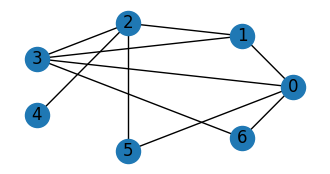

In [54]:
G = nx.Graph()
nx.add_path(G,[0,1,2,3])
G.add_edges_from([(3,1), (2,4), (0,5), (5,2), (0,3), (3,6), (6,0)])
fig, ax = plt.subplots(1,1, figsize=(4,2))

pos = nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels=True)
#nx.draw_planar(G, ax=ax, with_labels=True)

In [55]:
cents, rank = compare_cents(G, rank_compare=spearmanr)
print(cents, rank)

[0.4658479587994984, 0.42790299059455555, 0.4125460034106309, 0.49895035177551805, 0.12816669501209432, 0.27289284134209013, 0.2997362955824614]
{0: 0.13693328089638146, 1: 0.12712365618374932, 5: 0.103032678539374, 3: 0.14056121442047673, 6: 0.1046244327202673, 2: 0.13218184982633632, 4: 0.07220908557436778, '*': 0.18333380183904707}
[[0.18588984 0.1676735 ]
 [0.17074845 0.15566171]
 [0.16462047 0.16185542]
 [0.19909887 0.17211587]
 [0.05114305 0.08841934]
 [0.10889391 0.12616254]
 [0.1196054  0.12811162]] 0.9642857142857145


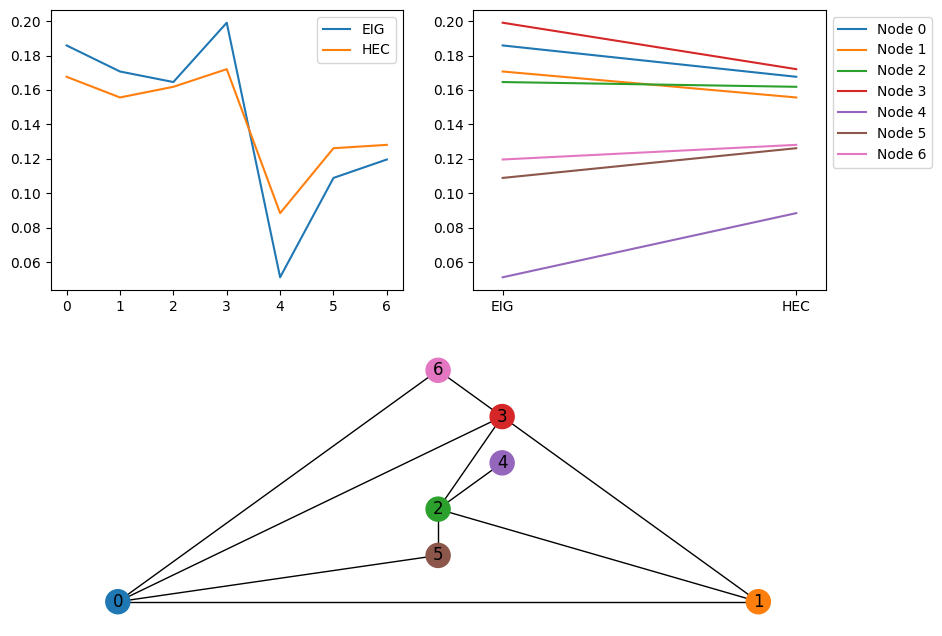

In [50]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# First figure

ax1.plot(cents[:,0], label='EIG')
ax1.plot(cents[:,1], label='HEC')
ax1.legend()

# Second figure

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0,1], ['EIG', 'HEC'])

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, row in enumerate(cents):
    ax2.plot(row, color=colors[i], label=f'Node {i}')

ax2.legend(bbox_to_anchor=(1,1))


# Graph:
ax3 = fig.add_subplot(212)
nx.draw_planar(G, ax=ax3, with_labels=True, node_color=colors[:len(cents[:,0])])

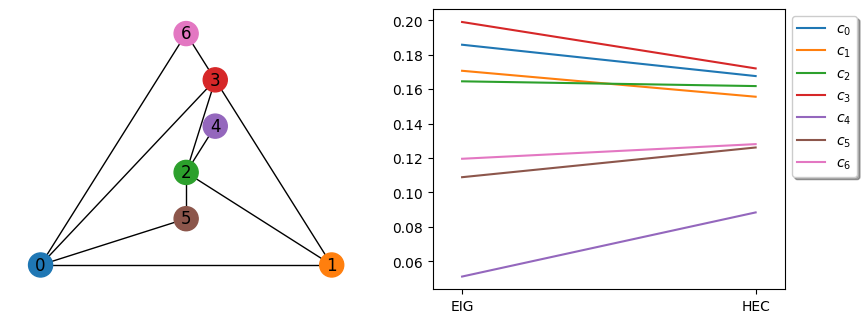

In [52]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# Graph:
nx.draw_planar(G, ax=ax1, with_labels=True, node_color=colors[:len(cents[:,0])])


# Second figure

ax2.set_xlim(-0.1,1.1)
ax2.set_xticks([0,1], ['EIG', 'HEC'])

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, row in enumerate(cents):
    ax2.plot(row, color=colors[i], label=f'$c_{i}$')

ax2.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True)

plt.savefig('Figures/pairwise_comparison.svg')

## Radar plot

In [13]:
# ------- PART 1: Create background
 
# number of variable
categories = [f"$c_{i}$" for i in range(cents.shape[0])]
N = cents.shape[0]
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 

In [14]:
cents.shape

(7, 2)

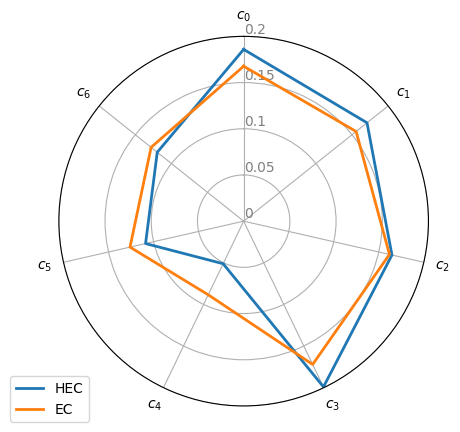

In [15]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.05,0.1,0.15,0.2], [0,0.05,0.1,0.15,0.2], color="grey", size=10)
plt.ylim(0, 0.2)

# ------- PART 2: Add plots
 
# HEC
values = cents[:,0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="HEC")
#ax.fill(angles, values, 'b', alpha=0.1)
 
# EC
values = cents[:,1].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="EC")
#ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()